In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import HGate, RYGate, RXGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Examples of Quantum Galton boards, from level 1 to 4

### 1 level QGB (total pegs: 1)

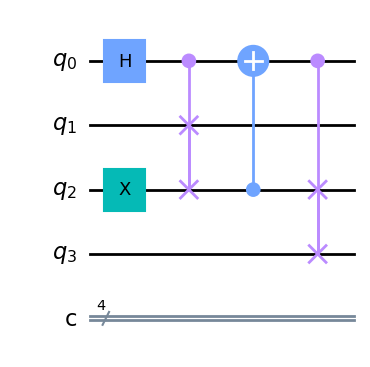

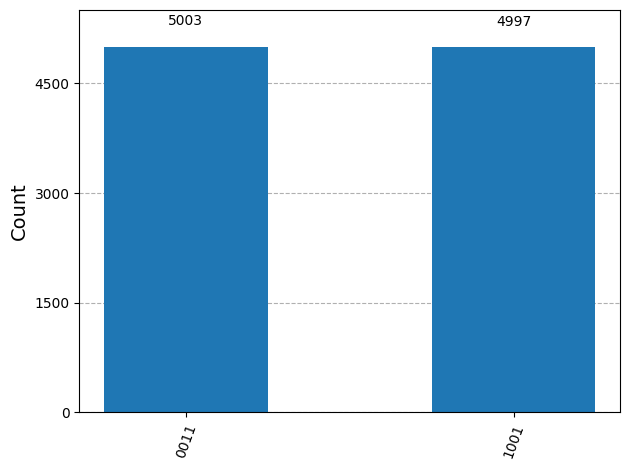

In [6]:
q= QuantumRegister(4, 'q')
c= ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

# Construction of peg. 
qc.h(q[0])
qc.x(q[2]) # The ball
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(0, 4):
    qc.measure(q[i], c[i])


backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
# print("Measurement results (bitstrings):")
# for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
#     print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


### Notice: All the bits in the outcome samples are not different. Only the bits at the $0^{th}$ and $2^{nd}$ position differ. 

### 2 level QGB (total pegs: 3)

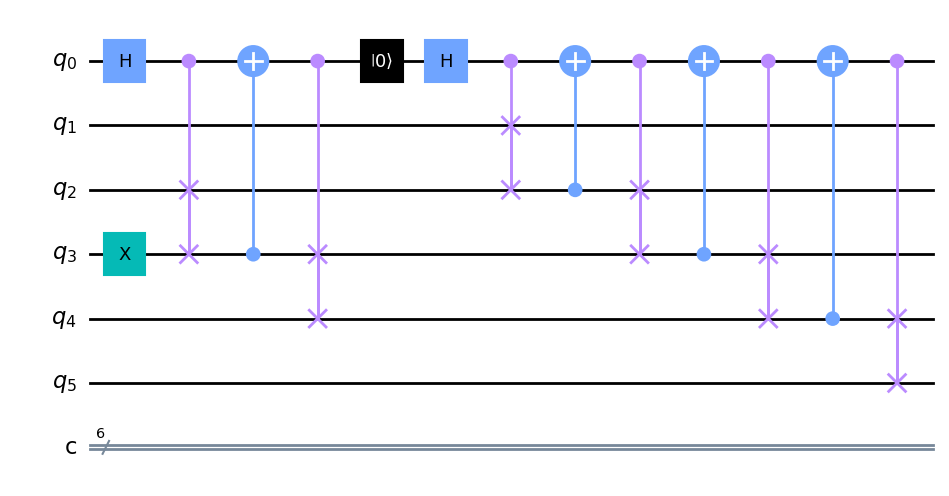

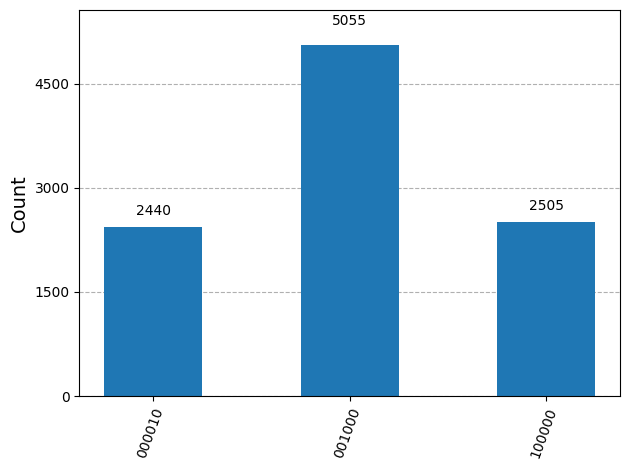

In [7]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(6, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[3])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(1, 6):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
# print("Measurement results (bitstrings):")
# for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
#     print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()




### Notice: All the bits in the outcome samples are not different. Only the bits at the $0^{th}$, $2^{nd}$ and $4^{th}$ position differ. 

### 3 level QGB (total pegs: 6)

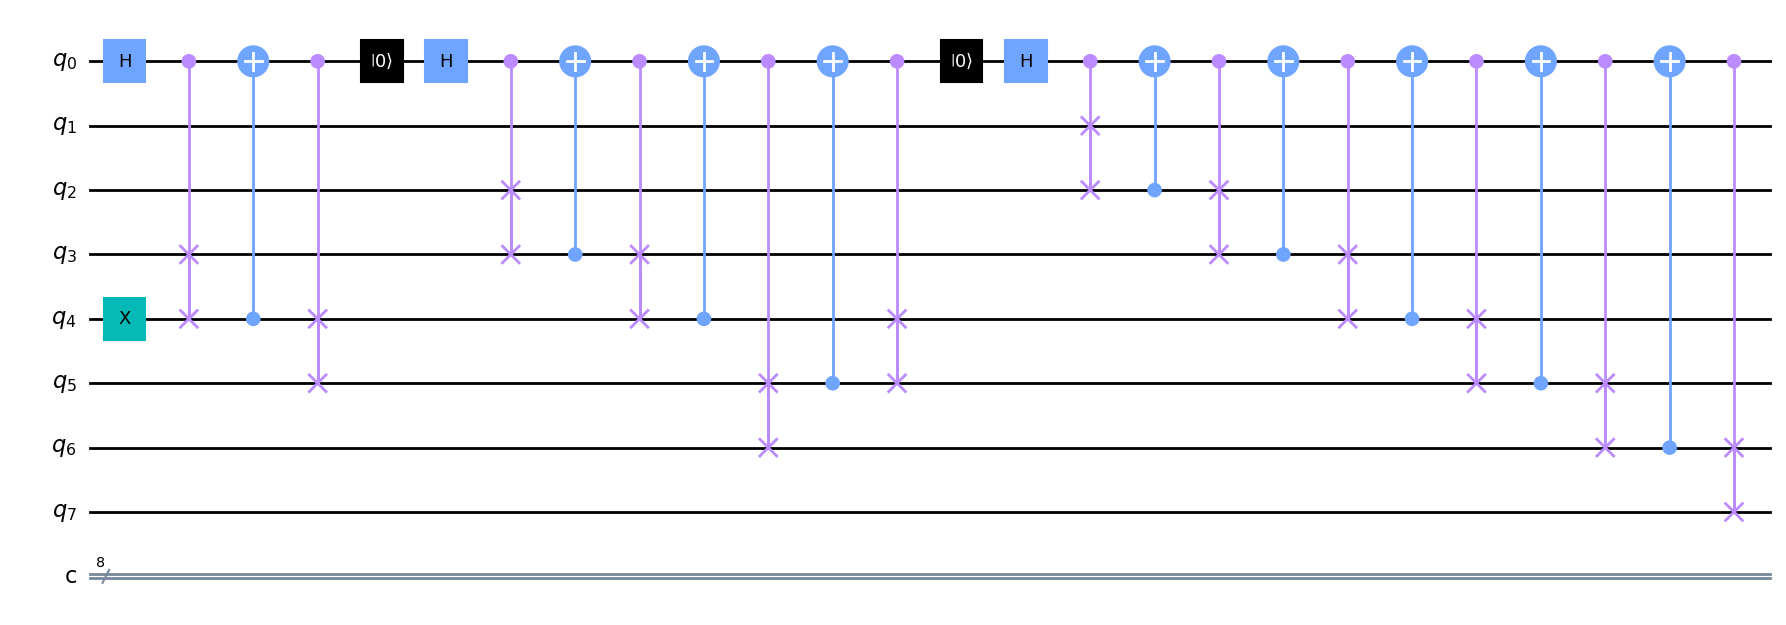

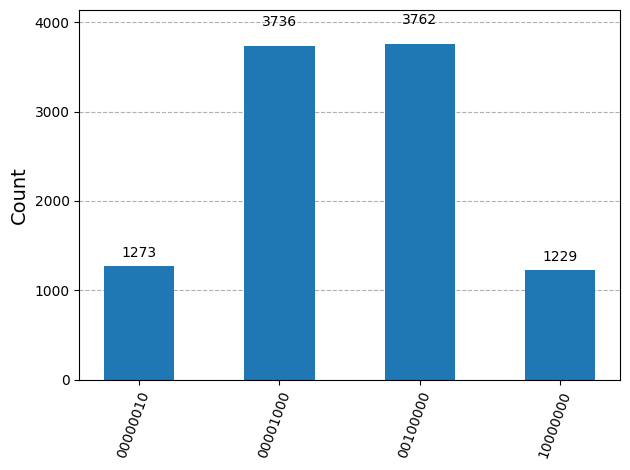

In [8]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[4])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])


qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])

qc.draw(output='mpl', style='clifford', fold=-1) 
plt.show()

for i in range(1, 8):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

plot_histogram(counts)
plt.show()


### Notice: Only the bits at the even position differ. 

## 4 level QGB (total pegs: 10)

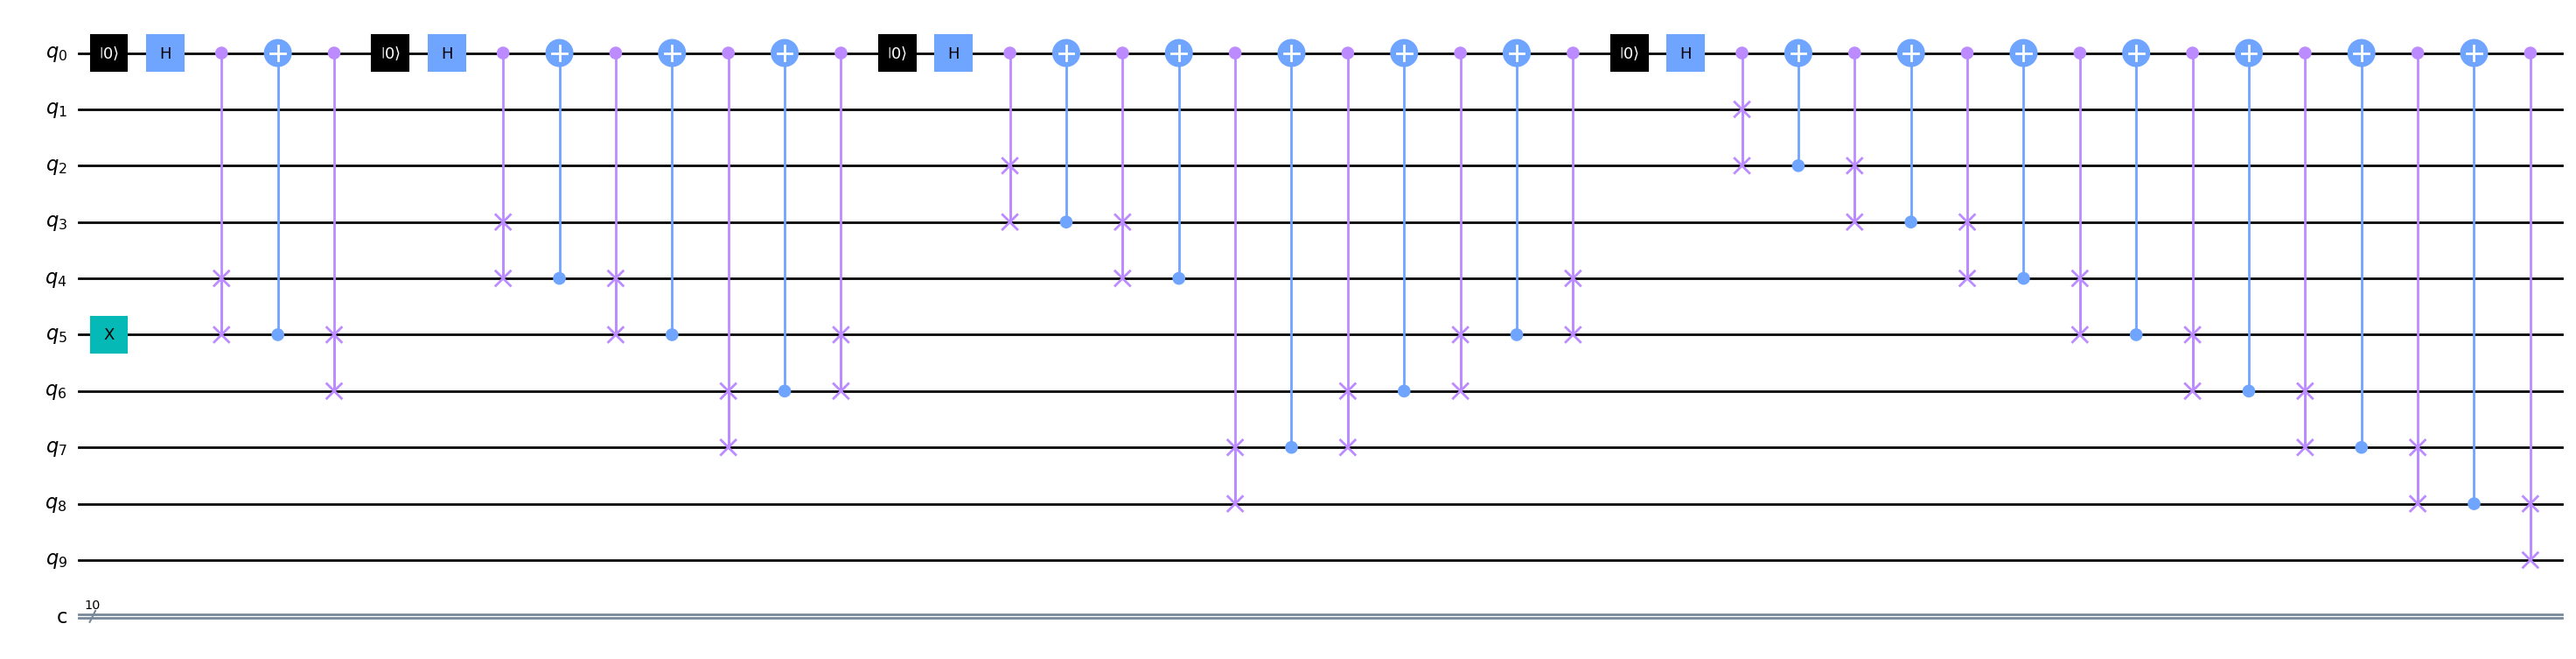

In [10]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6],q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])
qc.draw(output='mpl', style='clifford', fold=-1)
plt.show()
for i in range(1, 10):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

### We only keep the bits that differ as outcome labels for the horizontal axis

Even bits extracted from 0010000000: 01000
Even bits extracted from 1000000000: 10000
Even bits extracted from 0000100000: 00100
Even bits extracted from 0000001000: 00010
Even bits extracted from 0000000010: 00001


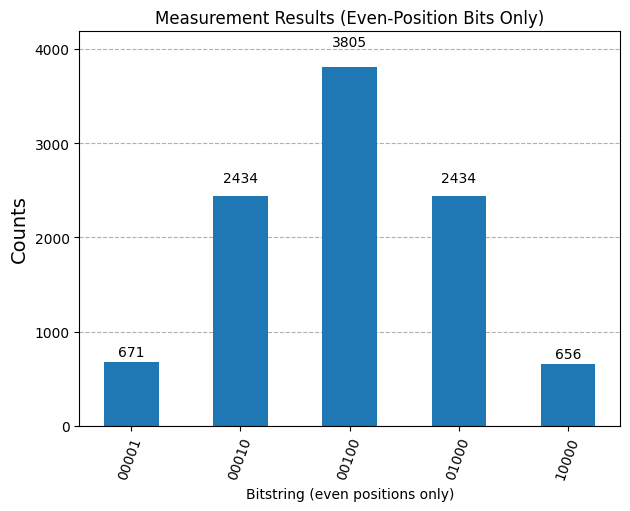

In [11]:
# Function to extract bits at even positions (index 0, 2, 4, ...)
def extract_even_bits(bitstring):
    return ''.join(bitstring[::-1][1::2])[::-1]  # reverse to match Qiskit order, slice, then reverse back

# Create new dictionary with even-position-only bitstrings
even_counts = {}
for bitstring, count in counts.items():
    even_bits = extract_even_bits(bitstring)
    print(f"Even bits extracted from {bitstring}: {even_bits}")
    even_counts[even_bits] = even_counts.get(even_bits, 0) + count

# Plot histogram with simplified labels
plot_histogram(even_counts)
plt.title("Measurement Results (Even-Position Bits Only)")
plt.xlabel("Bitstring (even positions only)")
plt.ylabel("Counts")
plt.show()

## Post processing to obtain the normal distribition

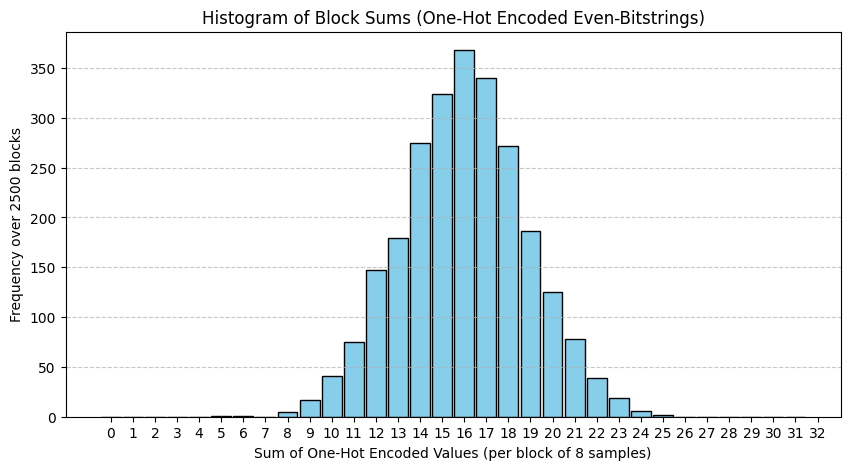

In [12]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=20000, memory=True)
memory = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

#bits that are different in the full outcome (even positions only change)
def extract_even_bits(bitstring):
    return ''.join(bitstring[::-1][1::2])[::-1]

even_bitstrings = [extract_even_bits(b) for b in memory]

# one hot encoding of the even bitstrings
unique_even = sorted(set(even_bitstrings))
bitstring_to_int = {b: i for i, b in enumerate(unique_even)}

# one hot encoding to integer labels
one_hot_values = [bitstring_to_int[b] for b in even_bitstrings]

# split into blocks of 8, compute sum per block (8 is the paper's choice) and note the frequency of each sum
block_size = 8
num_blocks = len(one_hot_values) // block_size
trimmed_values = one_hot_values[:num_blocks * block_size]
reshaped = np.array(trimmed_values).reshape((num_blocks, block_size))
block_sums = reshaped.sum(axis=1)

# Block sums histogram
plt.figure(figsize=(10, 5))
plt.hist(block_sums, bins=range(0, 33), align='left', rwidth=0.9, color='skyblue', edgecolor='black')
plt.xticks(range(0, 33))
plt.xlabel("Sum of One-Hot Encoded Values (per block of 8 samples)")
plt.ylabel("Frequency over 2500 blocks")
plt.title("Histogram of Block Sums (One-Hot Encoded Even-Bitstrings)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

____

_____

# Generalization

In [31]:
def _pair_sequence_shift_third(r: int, centre: int, right_edge: int) -> list[tuple[int, int]]:
    pairs = []
    first, second = (centre - r, centre - r + 1), (centre - r + 1, centre - r + 2)
    pairs.extend([first, second])

    if r == 1:  
        return pairs

    gap = 2 * r - 3
    third = (second[1] + gap, second[1] + gap + 1)
    if third[1] <= right_edge:
        pairs.append(third)

    cur = third[0] - 1
    while len(pairs) < 2 * r and cur >= first[0]:
        pair = (cur, cur + 1)
        if pair not in pairs:
            pairs.append(pair)
        cur -= 1
    return pairs

def galton_box_shifted(n: int, coin_gate, *, draw=False) -> QuantumCircuit:
    """
    Quantum Galton Box with customizable coin operations
    
    Args:
        n (int): Number of pegs/rows
        coin_gate: Quantum gate or function that returns a gate.
                   If function, should take row index (r) as input.
        draw (bool): Whether to draw the circuit
    
    Returns:
        QuantumCircuit: Configured Galton box circuit
    """
    total_q = 2 * n + 2
    data_q = 2 * n + 1
    centre = n + 1
    right = data_q
    anc = 0

    qc = QuantumCircuit(total_q, data_q)
    
    # Initialize ball at center
    qc.x(centre)

    # Process rows 1 to n-1 with custom coin gate
    for r in range(1, n):
        qc.reset(anc)
        
        # Apply custom coin operation
        if callable(coin_gate):
            # If coin_gate is a function, call it with current row index
            gate = coin_gate(r)
        else:
            # Use the gate directly
            gate = coin_gate
            
        qc.append(gate, [anc])

        # Get swap pairs for current row
        pairs = _pair_sequence_shift_third(r, centre, right)

        # Apply controlled-swap operations
        for i, (a, b) in enumerate(pairs):
            qc.cswap(anc, a, b)
            
            # Apply CX to next control
            if i < len(pairs) - 1:
                next_a, _ = pairs[i + 1]
                cx_control = b if next_a > a else a
                qc.cx(cx_control, anc)

    # Process final row (n) with custom coin gate
    qc.reset(anc)
    
    # Apply same coin selection logic for final row
    if callable(coin_gate):
        gate = coin_gate(n)  # Use row index n for final row
    else:
        gate = coin_gate
    qc.append(gate, [anc])

    # Final swap sequence
    i = 0
    while i <= data_q - 3:
        qc.cswap(anc, i + 1, i + 2)
        qc.cx(i + 2, anc)
        qc.cswap(anc, i + 2, i + 3)
        if i + 4 < data_q:
            qc.cx(i + 3, anc)
        i += 2
        
    if draw:
        qc.draw('mpl', style='clifford')
        plt.show()

    # Measure all data qubits
    for i in range(1, data_q + 1):
        qc.measure(i, i - 1)

    return qc


# Generalizing post processing to obtain the normal distribution
def post_process_histogram(memory_bitstrings, block_size):

    #bits that are different in the full outcome (even positions only change)
    def extract_even_bits(bitstring):
        return ''.join(bitstring[::-1][::2])[::-1]
    even_bitstrings = [extract_even_bits(b) for b in memory_bitstrings]
    
    # one hot encoding of the even bitstrings
    unique_even = sorted(set(even_bitstrings))
    bitstring_to_int = {b: i for i, b in enumerate(unique_even)}

    # one hot encoding to integer labels
    one_hot_values = [bitstring_to_int[b] for b in even_bitstrings]

    max_value = max(one_hot_values)
    bin_size= (block_size * max_value) + 1  # Adjust bin size based on block size and max value

    # split into blocks of 8, compute sum per block (8 is the paper's choice) and note the frequency of each sum
    num_blocks = len(one_hot_values) // block_size
    trimmed_values = one_hot_values[:num_blocks * block_size]
    reshaped = np.array(trimmed_values).reshape((num_blocks, block_size))
    block_sums = reshaped.sum(axis=1)

    return even_bitstrings, block_sums, bin_size

In [32]:
qc = galton_box_shifted(6, HGate(), draw=False)
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=100000, memory=True)
memory_counts = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

Block Size 5: Best-fit Normal Distribution: mean = 15.01, std = 2.73
Block Size 10: Best-fit Normal Distribution: mean = 30.02, std = 3.87
Block Size 15: Best-fit Normal Distribution: mean = 45.03, std = 4.73
Block Size 20: Best-fit Normal Distribution: mean = 60.04, std = 5.49


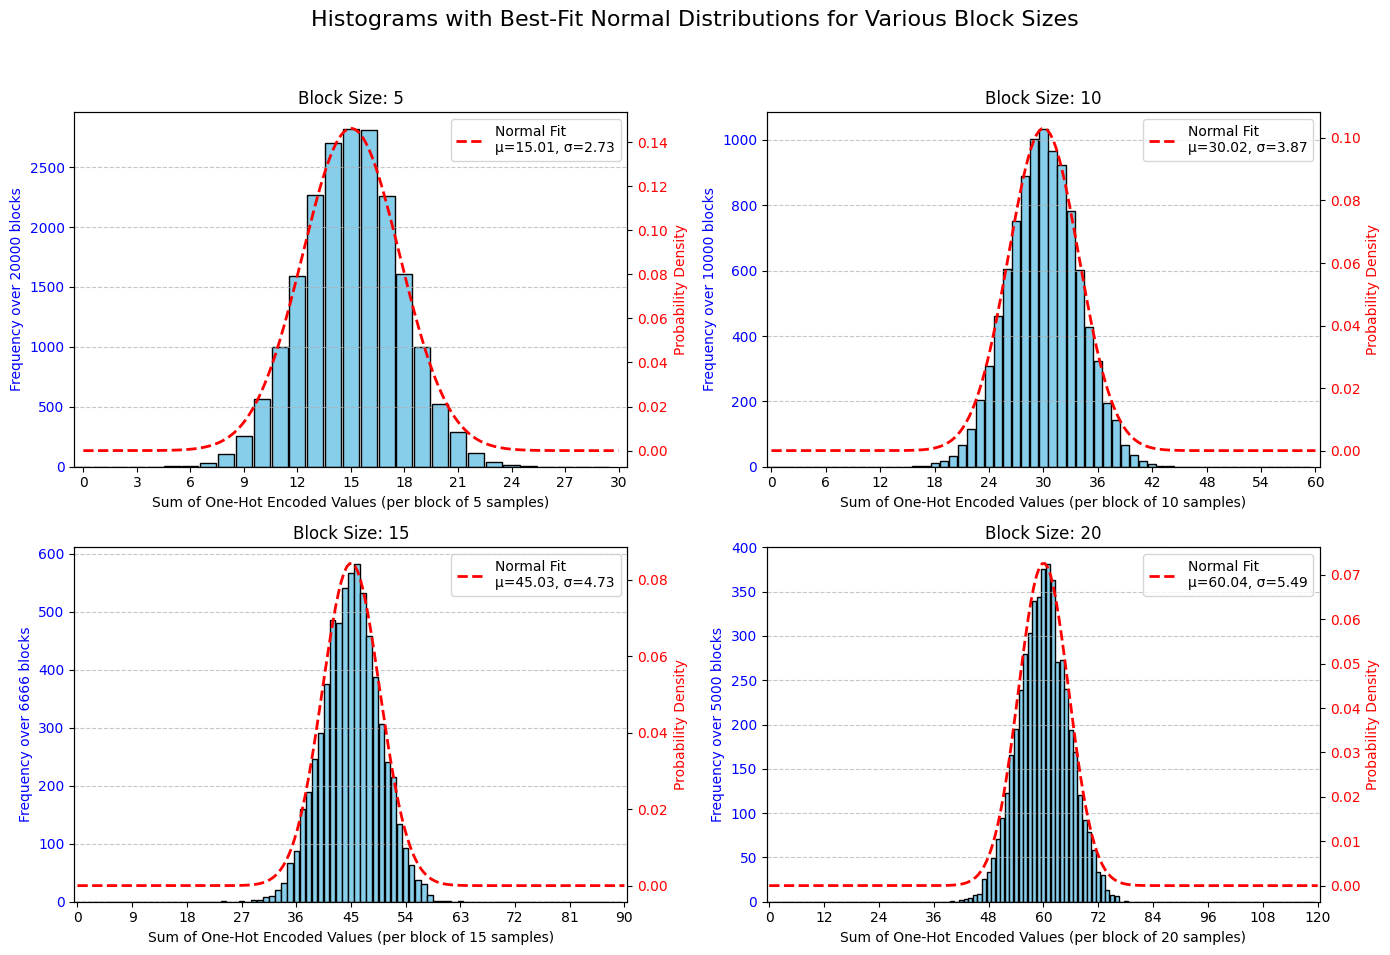

In [33]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kstest, norm

block_size_list = [5,10,15,20]  # Block size for summation

fig_outer, axs_outer = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes array for easier iteration if you prefer, or use 2D indexing
axs_outer_flat = axs_outer.flatten()

for i in range(len(block_size_list)):
    even_bitstrings, block_sums, bin_size = post_process_histogram(memory_counts, block_size_list[i])
    
    # Fit normal distribution
    mu, std = norm.fit(block_sums)   
    print(f"Block Size {block_size_list[i]}: Best-fit Normal Distribution: mean = {mu:.2f}, std = {std:.2f}")
    
    # Select the current subplot axes
    ax1 = axs_outer_flat[i]
    ax2 = ax1.twinx() # Create a twin axis for the PDF on the current subplot

    # Histogram (left axis)
    count, bins, _ = ax1.hist(block_sums, bins=range(0, bin_size), align='left', 
                              rwidth=0.9, color='skyblue', edgecolor='black')
    
    xmin_pdf, xmax_pdf = 0, bin_size - 1 # Adjusted to cover full possible range of sums
    x_pdf = np.linspace(xmin_pdf, xmax_pdf, 200) # More points for smoother curve
    p = norm.pdf(x_pdf, mu, std)
    ax2.plot(x_pdf, p, 'r--', linewidth=2, label=f'Normal Fit\nμ={mu:.2f}, σ={std:.2f}')
    
    # Add legend to the twin axis for the PDF curve
    ax2.legend(loc='upper right')

    # Labels and formatting for the current subplot
    ax1.set_xlabel(f"Sum of One-Hot Encoded Values (per block of {block_size_list[i]} samples)")
    # Assuming 100000 total samples, number of blocks is total_samples // block_size
    num_blocks_for_label = 100000 // block_size_list[i]
    ax1.set_ylabel(f"Frequency over {num_blocks_for_label} blocks", color='blue')
    ax2.set_ylabel("Probability Density", color='red')
    
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adjust x-ticks based on the block size for better readability
    # A more robust way to set xticks is to ensure they are within the data range
    tick_interval = max(1, bin_size // 10) # Roughly 10 ticks, at least 1
    ax1.set_xticks(np.arange(0, bin_size, tick_interval))
    ax1.set_xlim(-0.5, bin_size - 0.5) # Set x-limits to prevent bins from being cut off

    ax1.set_title(f"Block Size: {block_size_list[i]}") # Title for each subplot
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust overall title and layout
fig_outer.suptitle("Histograms with Best-Fit Normal Distributions for Various Block Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()


___
___

## Biased Peg

Processing Gate: h
  Block Size 5: mean = 12.47, std = 2.50
  Block Size 10: mean = 24.93, std = 3.52
  Block Size 15: mean = 37.40, std = 4.29
  Block Size 20: mean = 49.87, std = 4.96
Processing Gate: rx
  Block Size 5: mean = 9.42, std = 3.28
  Block Size 10: mean = 18.85, std = 4.63
  Block Size 15: mean = 28.27, std = 5.66
  Block Size 20: mean = 37.70, std = 6.48


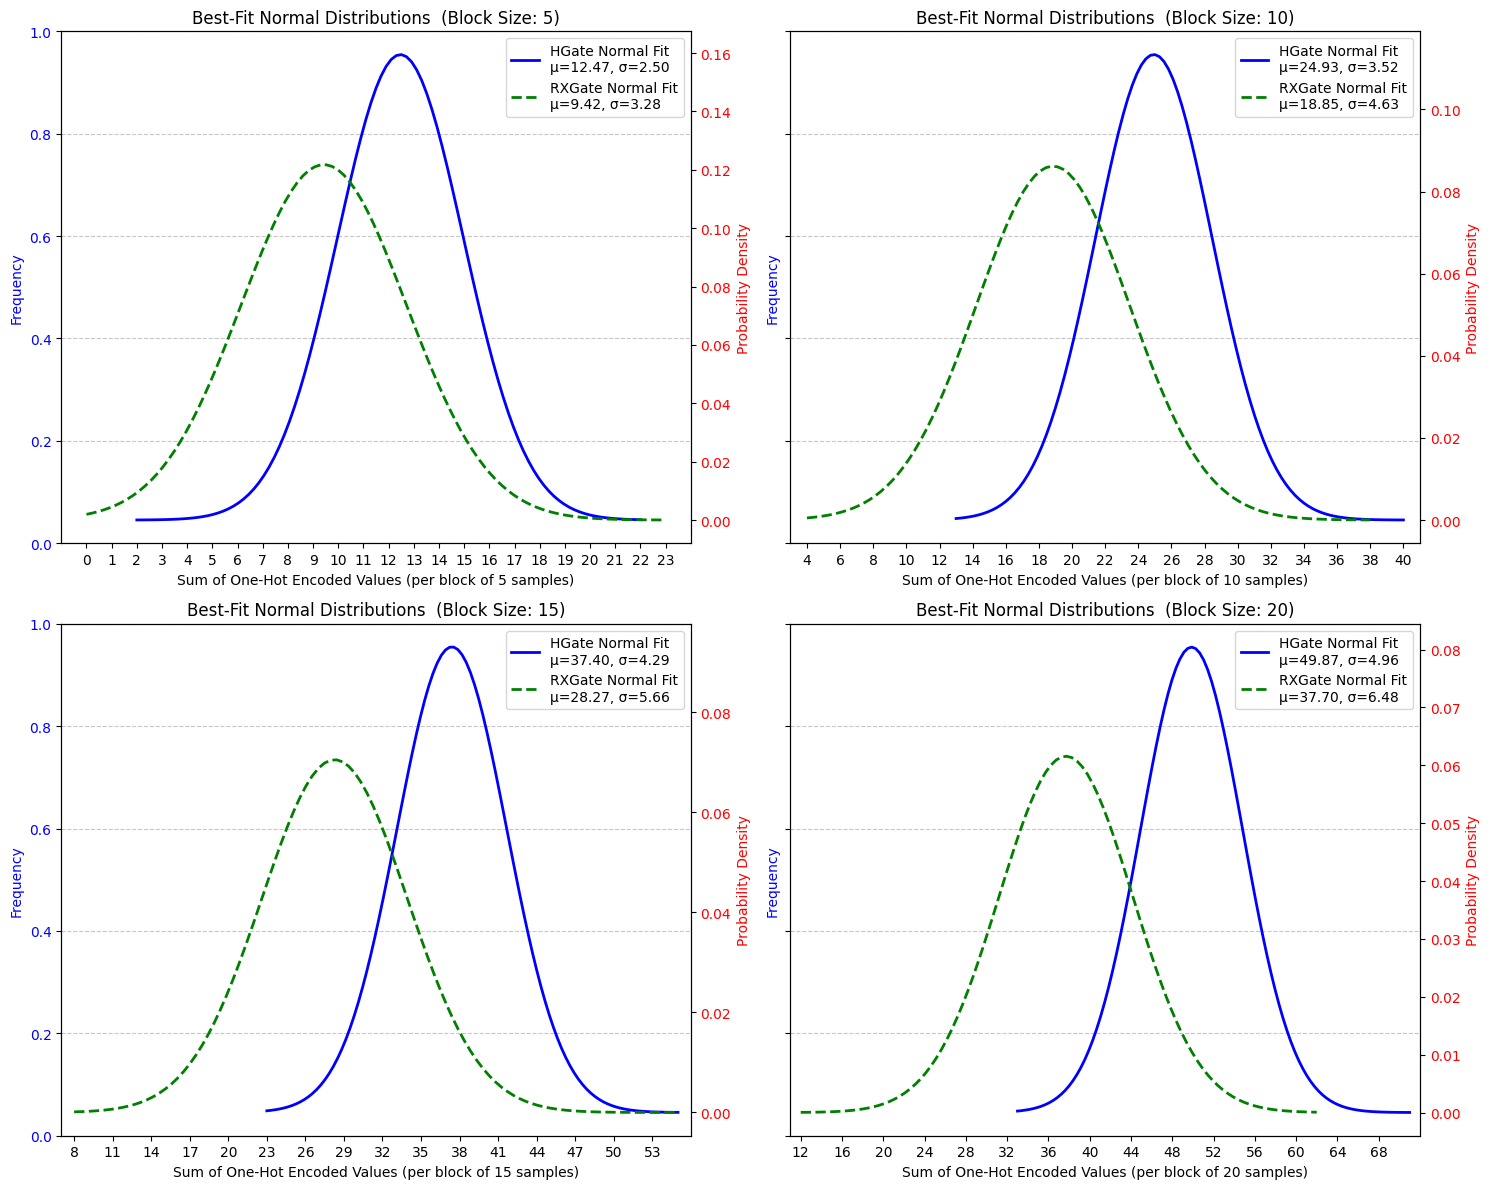

In [35]:
from scipy.stats import norm
gate_biased = [HGate(), RXGate(2 * np.pi/3)]
block_size_list = [5,10,15,20]  
data_to_plot = {bs: {} for bs in block_size_list}

for gate in gate_biased:
    qc = galton_box_shifted(5, gate, draw=False)
    backend = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, backend)
    job = backend.run(compiled, shots=100000, memory=True)
    memory_counts = job.result().get_memory()

    gate_name = gate.name if hasattr(gate, 'name') else str(gate)
    print(f"Processing Gate: {gate_name}")

    for block_size in block_size_list:
        _, block_sums, bin_size = post_process_histogram(memory_counts, block_size)
        mu, std = norm.fit(block_sums)
        data_to_plot[block_size][gate_name] = {'mu': mu, 'std': std, 'block_sums': block_sums, 'bin_size': bin_size}
        print(f"  Block Size {block_size}: mean = {mu:.2f}, std = {std:.2f}")


fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=False, sharey='row')
axes = axes.flatten() 

for i, block_size in enumerate(block_size_list):
    ax = axes[i]
    ax2 = ax.twinx() 

    title_suffix = f" (Block Size: {block_size})"
    
    # Get data for HGate
    hgate_data = data_to_plot[block_size]['h'] 
    mu_h, std_h = hgate_data['mu'], hgate_data['std']
    block_sums_h = hgate_data['block_sums']
    bin_size_h = hgate_data['bin_size']

    # Get data for RXGate
    rxgate_data = data_to_plot[block_size]['rx'] 
    mu_rx, std_rx = rxgate_data['mu'], rxgate_data['std']
    block_sums_rx = rxgate_data['block_sums']
    bin_size_rx = rxgate_data['bin_size']

    # Plot HGate Normal Fit
    xmin_h, xmax_h = min(block_sums_h), max(block_sums_h)
    x_h = np.linspace(xmin_h, xmax_h, 100)
    p_h = norm.pdf(x_h, mu_h, std_h)
    ax2.plot(x_h, p_h, 'b-', linewidth=2, label=f'HGate Normal Fit\nμ={mu_h:.2f}, σ={std_h:.2f}')

    # Plot RXGate Normal Fit
    xmin_rx, xmax_rx = min(block_sums_rx), max(block_sums_rx)
    x_rx = np.linspace(xmin_rx, xmax_rx, 100)
    p_rx = norm.pdf(x_rx, mu_rx, std_rx)
    ax2.plot(x_rx, p_rx, 'g--', linewidth=2, label=f'RXGate Normal Fit\nμ={mu_rx:.2f}, σ={std_rx:.2f}')

    # Set labels and title
    ax.set_xlabel(f"Sum of One-Hot Encoded Values (per block of {block_size} samples)")
    ax.set_ylabel("Frequency", color='blue') # Placeholder, as we are not plotting histogram directly here
    ax2.set_ylabel("Probability Density", color='red')
    ax.set_title(f"Best-Fit Normal Distributions {title_suffix}")

    ax.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')

    all_x_values = list(block_sums_h) + list(block_sums_rx) # Convert to list here
    if all_x_values:
        min_overall_x = min(all_x_values)
        max_overall_x = max(all_x_values)
        ax.set_xlim(min_overall_x - 1, max_overall_x + 1)
        ax.set_xticks(range(int(min_overall_x), int(max_overall_x) + 1, max(1, block_size // 5))) # Adjust x-ticks

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Thus a peg designed to perform the action of $R_x$ gate leads to a skewed normal distribution.

___

## How to get distributions other than normal?

Processing Gate: rx
Even bits extracted from 0010000000000: 0100000
Even bits extracted from 0000100000000: 0010000
Even bits extracted from 0000000000100: 0000010
Even bits extracted from 0000001000000: 0001000
Even bits extracted from 0000000010000: 0000100


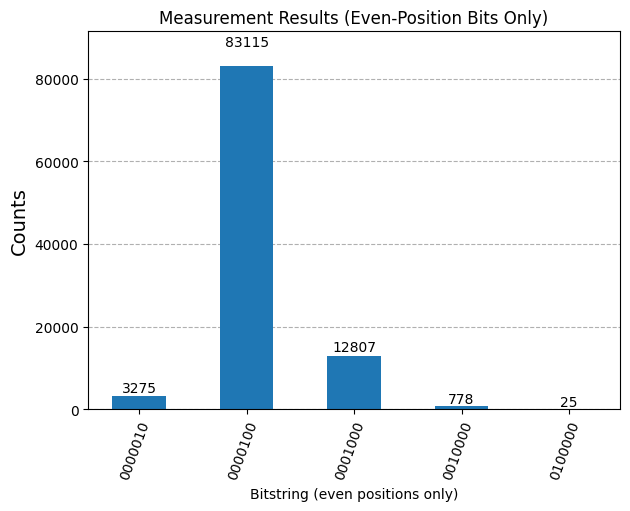

In [ ]:
from scipy.stats import norm
gate_biased = [RXGate(np.pi/8)]  # try  (already tested different initializations of the ball- X, Y, Z, H)

for gate in gate_biased:
    qc = galton_box_shifted(6, gate, draw=False)
    backend = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, backend)
    job = backend.run(compiled, shots=100000)
    counts = job.result().get_counts()

    gate_name = gate.name if hasattr(gate, 'name') else str(gate)
    print(f"Processing Gate: {gate_name}")
    # Function to extract bits at even positions (index 0, 2, 4, ...)
    def extract_even_bits(bitstring):
        return ''.join(bitstring[::-1][::2])[::-1]  # reverse to match Qiskit order, slice, then reverse back

    # Create new dictionary with even-position-only bitstrings
    even_counts = {}
    for bitstring, count in counts.items():
        even_bits = extract_even_bits(bitstring)
        print(f"Even bits extracted from {bitstring}: {even_bits}")
        even_counts[even_bits] = even_counts.get(even_bits, 0) + count

    # Plot histogram with simplified labels
    plot_histogram(even_counts)
    plt.title("Measurement Results (Even-Position Bits Only)")
    plt.xlabel("Bitstring (even positions only)")
    plt.ylabel("Counts")
    plt.show()

#### Looks like exponential here, but when post processing done the resulting distribution becomes normal. May be we can try different post processing types (other than paper's method)?


___

In [ ]:

# all the below codes are work in progress for exercise 3

# def row_dependent_gate(r):
#     p = 0.5 + 0.1* r  # Increasing right probability
#     theta = 2 * np.arccos(np.sqrt(p))
#     return RYGate(theta)
# def quantum_walk_gate(r):
#     """Creates a custom rotation gate for quantum walk behavior"""
#     angle = np.pi/(r+1)  # Angle decreases with depth
#     qc = QuantumCircuit(1, name=f"QW_{r}")
#     qc.ry(angle, 0)
#     return qc.to_gate()

# gate_set= [RXGate(2 * np.arccos(np.sqrt(0.2))), row_dependent_gate, quantum_walk_gate]

# for gate in gate_set:
#     qc = galton_box_shifted(5, gate)
#     backend = Aer.get_backend('qasm_simulator')
#     compiled = transpile(qc, backend)
#     job = backend.run(compiled, shots=100000, memory=True)
#     memory_counts = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

#     print(f"Gate: {gate.name if hasattr(gate, 'name') else gate}")
#     block_size_list = [5, 10,15,20]  # Block size for summation

#     for i in range(len(block_size_list)):

#         even_bitstrings, block_sums, bin_size = post_process_histogram(memory_counts, block_size_list[i])
#         plt.figure(figsize=(10, 5))
#         plt.hist(block_sums, bins=range(0, bin_size), align='left', rwidth=0.9, color='skyblue', edgecolor='black')
#         plt.xticks(range(0, bin_size, 2*block_size_list[i]))  # Adjust x-ticks for better readability
#         plt.xlabel("Sum of One-Hot Encoded Values (per block of {} samples)".format(block_size_list[i]))
#         plt.ylabel("Frequency over {} blocks".format(100000//block_size_list[i]), color='blue')
#         plt.title("Histogram of Block Sums (One-Hot Encoded Even-Bitstrings)")
#         plt.grid(axis='y', linestyle='--', alpha=0.7)
#         plt.show()
    


___
___

## Noise simulations

In [ ]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.transpiler import Layout

service = QiskitRuntimeService() # please save your details first
service.saved_accounts()
seed= 42

real_backends = service.backends()
print(f"The quantum computers available for you are {real_backends}")

real_backends = [
    service.backend("ibm_brisbane"),
    service.backend("ibm_sherbrooke"),
    service.backend("ibm_torino"),
]

noisy_fake_backends = []
for backend in real_backends:
    noisy_fake_backends.append(AerSimulator.from_backend(backend, seed_simulator=seed))
print(f"The noisy simulators are {noisy_fake_backends}")


The quantum computers available for you are [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>]
The noisy simulators are [AerSimulator('aer_simulator_from(ibm_brisbane)'
             noise_model=<NoiseModel on ['id', 'reset', 'measure', 'sx', 'x', 'ecr']>), AerSimulator('aer_simulator_from(ibm_sherbrooke)'
             noise_model=<NoiseModel on ['id', 'reset', 'measure', 'sx', 'x', 'ecr']>), AerSimulator('aer_simulator_from(ibm_torino)'
             noise_model=<NoiseModel on ['id', 'reset', 'measure', 'cz', 'sx', 'x']>)]


In [ ]:
# Rough work (codes for veiwing the properties of the backend)
pm = generate_preset_pass_manager(
        backend=noisy_fake_backends[2],
        optimization_level=3,
        seed_transpiler=seed,
    )
n=5
qc = galton_box_shifted(n, HGate(), draw=False)
qc_transpiled = pm.run(qc)

properties = noisy_fake_backends[2].properties()
print(f"Properties of the backend {noisy_fake_backends[2].name}:")
print(f"Number of qubits: {noisy_fake_backends[2].num_qubits}")
# print(f"Coupling map: {noisy_fake_backends[2].coupling_map}")
print(f"Readout error: {properties.readout_error(2)}")
print(noisy_fake_backends[2].configuration().basis_gates)


qubit_layout = list(qc_transpiled.layout.initial_layout.get_physical_bits().keys())[:5]
print(f"Qubit layout: {qubit_layout}")


Properties of the backend aer_simulator_from(ibm_torino):
Number of qubits: 133
Readout error: 0.046630859375
['cz', 'id', 'rz', 'sx', 'x', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 'set_unitary', 'superop', 'switch_case', 'while_loop']
Qubit layout: [67, 66, 68, 74, 69]


In [ ]:
# Define a function that calculates the accumulated total errors of single and two qubit gates and readout

def accumulated_errors(backend: QiskitRuntimeService.backend, circuit: QuantumCircuit) -> list:
    """Compute accumulated gate and readout errors for a given circuit on a specific backend."""

    # Initializing quantities
    acc_single_qubit_error = 0
    acc_two_qubit_error = 0
    single_qubit_gate_count = 0
    two_qubit_gate_count = 0
    acc_readout_error = 0

    # Defining useful variables
    properties = backend.properties()
    qubit_layout = list(circuit.layout.initial_layout.get_physical_bits().keys())[:n]


    acc_readout_error=0
    for q in qubit_layout:
        acc_readout_error+= properties.readout_error(q)
    if "ecr" in backend.configuration().basis_gates: 
        two_qubit_gate = "ecr"
    elif "cz" in backend.configuration().basis_gates: 
        two_qubit_gate = "cz"
    for instruction in circuit.data:
        if instruction.operation.num_qubits == 1 and instruction.operation.name != 'measure' and instruction.operation.name != 'reset':
            qubits = [circuit.qubits.index(q) for q in instruction.qubits]
            acc_single_qubit_error += properties.gate_error(gate=instruction.operation.name, qubits=qubits)
            single_qubit_gate_count += 1
        elif instruction.operation.num_qubits == 2:
            qubits = [circuit.qubits.index(q) for q in instruction.qubits]
            acc_two_qubit_error += properties.gate_error(gate=two_qubit_gate, qubits=qubits)
            two_qubit_gate_count += 1

    acc_total_error = acc_two_qubit_error + acc_single_qubit_error + acc_readout_error
    results = [
        acc_total_error,
        acc_two_qubit_error,
        acc_single_qubit_error,
        acc_readout_error,
        single_qubit_gate_count,
        two_qubit_gate_count,
    ]
    return results


gaussian_transpiled_list = []
errors_and_counts_list = []
for noisy_fake_backend in noisy_fake_backends:
    pm = generate_preset_pass_manager(
        backend=noisy_fake_backend,
        optimization_level=3,
        seed_transpiler=seed,
    )
    circuit_transpiled = pm.run(qc)
    gaussian_transpiled_list.append(circuit_transpiled)

    errors_and_counts = accumulated_errors(noisy_fake_backend, circuit_transpiled)
    errors_and_counts_list.append(errors_and_counts)

for backend, (
    acc_total_error,
    acc_two_qubit_error,
    acc_single_qubit_error,
    acc_readout_error,
    single_qubit_gate_count,
    two_qubit_gate_count,
) in zip(noisy_fake_backends, errors_and_counts_list):
    print(f"Backend {backend.name}")
    print(f"Accumulated two-qubit error of {two_qubit_gate_count} gates: {acc_two_qubit_error:.3f}")
    print(
        f"Accumulated one-qubit error of {single_qubit_gate_count} gates: {acc_single_qubit_error:.3f}"
    )
    print(f"Accumulated readout error: {acc_readout_error:.3f}")
    print(f"Accumulated total error: {acc_total_error:.3f}\n")

Backend aer_simulator_from(ibm_brisbane)
Accumulated two-qubit error of 473 gates: 2.756
Accumulated one-qubit error of 2378 gates: 0.220
Accumulated readout error: 0.068
Accumulated total error: 3.045

Backend aer_simulator_from(ibm_sherbrooke)
Accumulated two-qubit error of 473 gates: 3.601
Accumulated one-qubit error of 2369 gates: 0.290
Accumulated readout error: 0.056
Accumulated total error: 3.946

Backend aer_simulator_from(ibm_torino)
Accumulated two-qubit error of 464 gates: 1.411
Accumulated one-qubit error of 1544 gates: 0.296
Accumulated readout error: 0.086
Accumulated total error: 1.793



#### Notice since our two qubit gate count for the circuit (n=5 case here) is too high, the Accumulated total error is very high. ibm_torino is comparitively better.

### Let's try to reduce this error by mapping logical qubits to physical qubits such that the two qubit error gets minimized. 

In [119]:
num_backend = 2
noisy_fake_backend = noisy_fake_backends[num_backend]

pm = generate_preset_pass_manager(
    backend=noisy_fake_backend,
    optimization_level=3,
    seed_transpiler=seed
)
circuit_transpiled = pm.run(qc)


def two_qubit_gate_errors_per_circuit_layout(
    circuit: QuantumCircuit, backend: QiskitRuntimeService.backend
) -> tuple:
    """Calculate accumulated two-qubit gate errors and related metrics for a given circuit layout."""
    pair_list = []
    error_pair_list = []
    error_acc_pair_list = []
    two_qubit_gate_count = 0
    properties = backend.properties()
    if "ecr" in (backend.configuration().basis_gates):
        two_qubit_gate = "ecr"
    elif "cz" in (backend.configuration().basis_gates):
        two_qubit_gate = "cz"
    for instruction in circuit.data:
        if instruction.operation.num_qubits == 2:
            two_qubit_gate_count += 1
            pair = [instruction.qubits[0]._index, instruction.qubits[1]._index]
            error_pair = properties.gate_error(gate=two_qubit_gate, qubits=pair)
            if pair not in (pair_list):
                pair_list.append(pair)
                error_pair_list.append(error_pair)
                error_acc_pair_list.append(error_pair)
            else:
                pos = pair_list.index(pair)
                error_acc_pair_list[pos] += error_pair

    acc_two_qubit_error = sum(error_acc_pair_list)
    return (
        acc_two_qubit_error,
        two_qubit_gate_count,
        pair_list,
        error_pair_list,
        error_acc_pair_list,
    )

(
    acc_two_qubit_error,
    two_qubit_gate_count,
    pair_list,
    error_pair_list,
    error_acc_pair_list,
) = two_qubit_gate_errors_per_circuit_layout(circuit_transpiled, noisy_fake_backend)


two_qubit_ops_list = [int(a / b) for a, b in zip(error_acc_pair_list, error_pair_list)]

print(f"The pairs of qubits that need to perform two-qubit operations are:\n {pair_list}")
print(
    f"The errors introduced by each of the two-qubit operations are:\n {[round(err,3) for err in error_pair_list]}"
)
print(
    f"The accumulated errors introduced by each of the two-qubit operations are:\n {[round(err,3) for err in error_acc_pair_list]}"
)
print(f"The repetitions of each one of the two-qubit operations is:\n {two_qubit_ops_list}")
print(f"The number of two-qubit operations in total:\n {two_qubit_gate_count}")
print(f"The total accumulated error by two-qubit operations is:\n {acc_two_qubit_error:.3f}")

The pairs of qubits that need to perform two-qubit operations are:
 [[66, 67], [74, 67], [67, 74], [67, 66], [65, 66], [67, 68], [66, 65], [55, 65], [68, 67], [68, 69], [69, 68], [56, 69], [65, 55], [46, 55], [69, 56], [70, 69], [55, 46], [45, 46], [69, 70], [46, 45], [50, 56]]
The errors introduced by each of the two-qubit operations are:
 [0.003, 0.002, 0.002, 0.003, 0.002, 0.003, 0.002, 0.005, 0.003, 0.002, 0.002, 0.005, 0.005, 0.002, 0.005, 0.003, 0.002, 0.005, 0.003, 0.005, 0.003]
The accumulated errors introduced by each of the two-qubit operations are:
 [0.087, 0.145, 0.075, 0.118, 0.062, 0.221, 0.067, 0.08, 0.048, 0.083, 0.036, 0.086, 0.095, 0.015, 0.045, 0.057, 0.022, 0.011, 0.021, 0.016, 0.021]
The repetitions of each one of the two-qubit operations is:
 [28, 60, 31, 38, 25, 69, 27, 17, 15, 37, 16, 17, 20, 7, 9, 19, 10, 2, 7, 3, 7]
The number of two-qubit operations in total:
 464
The total accumulated error by two-qubit operations is:
 1.411


In [ ]:
def finding_best_seed(
    circuit: QuantumCircuit, backend: QiskitRuntimeService.backend
) -> tuple[QuantumCircuit, int, float, int]:
    """Find the transpiler seed that minimizes two-qubit gate error for a given circuit and backend."""

    # We initialize the minimum error accumulated
    min_err_acc_seed_loop = 100
    circuit_opt_best_seed = None
    for seed_transpiler in range(0, 500):
        pm = generate_preset_pass_manager(
            backend=backend,
            optimization_level=3,
            seed_transpiler=seed_transpiler,
            layout_method="sabre",
        )
        circuit_opt_seed = pm.run([circuit])[0]
        (
            acc_two_qubit_error_seed_loop,
            two_qubit_gate_count_seed_loop,
            pair_list,
            error_pair_list,
            error_acc_pair_list,
        ) = two_qubit_gate_errors_per_circuit_layout(circuit_opt_seed, backend)
        if acc_two_qubit_error_seed_loop < min_err_acc_seed_loop:
            min_err_acc_seed_loop = acc_two_qubit_error_seed_loop
            circuit_opt_best_seed = circuit_opt_seed
            best_seed_transpiler = seed_transpiler

    return (
        circuit_opt_best_seed,
        best_seed_transpiler,
        min_err_acc_seed_loop,
        two_qubit_gate_count_seed_loop,
    )

(
    circuit_opt_seed_loop,
    best_seed_transpiler,
    min_err_acc_seed_loop,
    two_qubit_gate_count_seed_loop,
) = finding_best_seed(qc, noisy_fake_backend)

best_layout = list(circuit_opt_seed_loop.layout.initial_layout.get_physical_bits().keys())[:n]
print(f"Best transpiler seed: {best_seed_transpiler}")
print(f"Minimum accumulated two-qubit gate error: {min_err_acc_seed_loop:.3f}")
print(f"Two-qubit gate count for best seed: {two_qubit_gate_count_seed_loop}")
print(f"Best layout (first n logical qubits mapped to physical qubits):\n {best_layout}")

Best transpiler seed: 292
Minimum accumulated two-qubit gate error: 1.076
Two-qubit gate count for best seed: 473
Best layout (first n logical qubits mapped to physical qubits):
 [98, 81, 80, 92, 99]


#### Thus the accumulated two-qubit gate error reduced to 1.076 for ibm_torino.

In [122]:
from qiskit_ibm_runtime import Sampler
sampler = Sampler(noisy_fake_backend)
result = sampler.run([circuit_opt_seed_loop] , shots=100000).result()


In [123]:
data_bin = result[0].data
counts = {}
for creg in qc.cregs:
    creg_name = creg.name
    if hasattr(data_bin, creg_name):
        counts = getattr(data_bin, creg_name).get_counts()

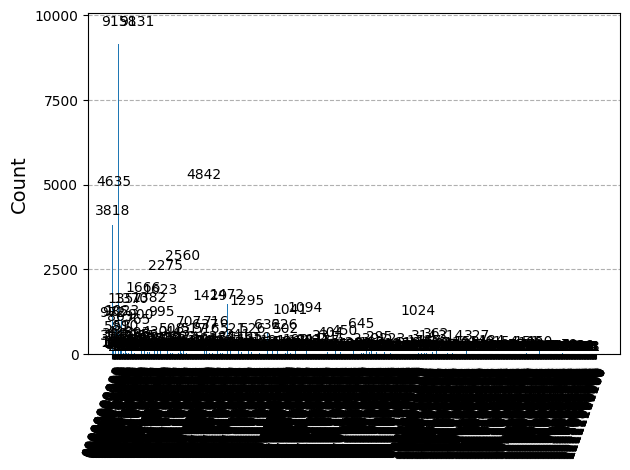

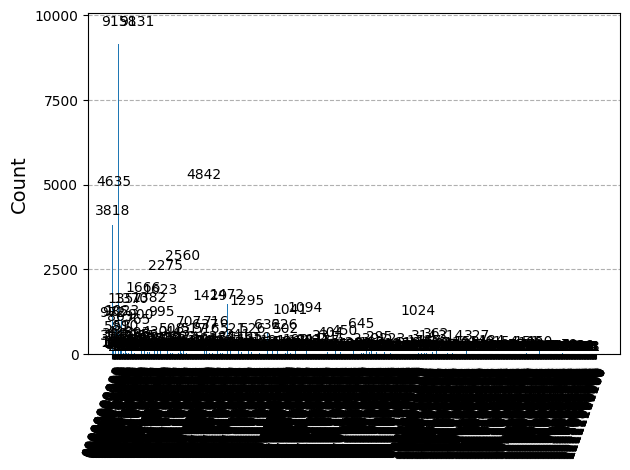

In [124]:
plot_histogram(counts)

### Not good, too much error. 

## Gate count analysis

### Are all measurements required?
